<a href="https://colab.research.google.com/github/Afqufai/MachineLearning2025_03/blob/main/TG6_2341720083_Afrizal_Qurratul_Faizin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Praktikum 1 - ANNOY

In [1]:
!pip install annoy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 647.5/647.5 kB 8.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for annoy: filename=annoy-1.17.3-cp312-cp312-linux_x86_64.whl size=551812 sha256=9224a09cd5f9a35f46302a4219dfac4b067691d55d6721ca176da649a7724389
  Stored in directory: /root/.cache/pip/wheels/db/b9/53/a3b2d1fe1743abadddec6aa541294b24fdbc39d7800bc57311
Successfully built annoy


Exact NN index: [219 898 593]
Exact NN jarak: [0.         1.36915938 2.27931544]
Waktu Exact: 13.294 ms

Annoy NN index: [219, 898, 770]
Annoy NN jarak: [np.float64(0.0), np.float64(1.369159376273702), np.float64(2.568167959732514)]
Waktu Annoy: 0.1304 ms


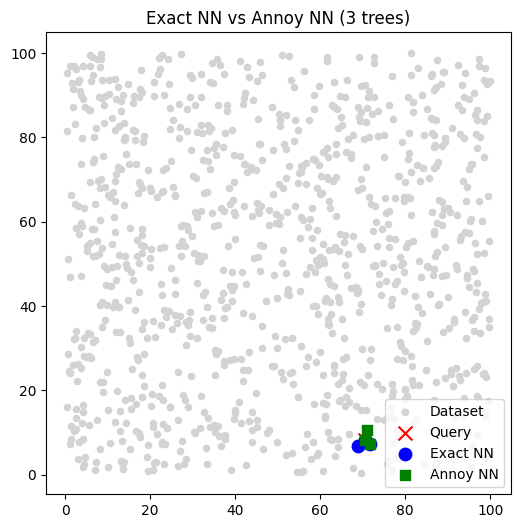

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import time

from annoy import AnnoyIndex

# 1. Dataset 2D
np.random.seed(42)
n_points = 1000
X = np.random.rand(n_points, 2) * 100  # titik random dalam ruang 100x100

# Query point (ambil salah satu titik random)
query = X[np.random.randint(0, n_points)]

# 2. Exact NN (brute force)
start = time.time()
distances = np.linalg.norm(X - query, axis=1)
idx_exact = np.argsort(distances)[:3]  # ambil 3 terdekat
time_exact = time.time() - start

print("Exact NN index:", idx_exact)
print("Exact NN jarak:", distances[idx_exact])
print("Waktu Exact:", round(time_exact*1000, 4), "ms")

# 3. Annoy NN (3 tree)
f = 2  # dimensi
t = AnnoyIndex(f, 'euclidean')
for i, vec in enumerate(X):
    t.add_item(i, vec)

t.build(3)  # 3 trees

start = time.time()
idx_ann = t.get_nns_by_vector(query, 3)  # cari 3 NN
time_ann = time.time() - start

print("\nAnnoy NN index:", idx_ann)
print("Annoy NN jarak:", [np.linalg.norm(X[i]-query) for i in idx_ann])
print("Waktu Annoy:", round(time_ann*1000, 4), "ms")

# 4. Visualisasi hasil
plt.figure(figsize=(6,6))
plt.scatter(X[:,0], X[:,1], c="lightgray", s=20, label="Dataset")
plt.scatter(query[0], query[1], c="red", marker="x", s=100, label="Query")

# Exact NN ditandai biru
plt.scatter(X[idx_exact,0], X[idx_exact,1], c="blue", s=80, label="Exact NN")

# Annoy NN ditandai hijau
plt.scatter(X[idx_ann,0], X[idx_ann,1], c="green", s=50, marker="s", label="Annoy NN")

plt.legend()
plt.title("Exact NN vs Annoy NN (3 trees)")
plt.show()

Percobaan Mengisi Tabel

In [9]:
!pip install annoy -q

import numpy as np
import time
from annoy import AnnoyIndex
from scipy.spatial.distance import cdist
import warnings

warnings.filterwarnings('ignore')

n_dims = 2
list_n_points = [1000, 100000]
list_n_trees = [3, 6, 8]
list_metrics = ['euclidean', 'angular']
k_neighbors = 3

print(f"{'Metric':<10} | {'Tree':<5} | {'N Points':<10} | {'Hasil Index ENN vs ANN':<50} | {'Waktu komputasi Vs (ms)':<25}")
print("-" * 110)

# --- Mulai Eksperimen ---
for n_points in list_n_points:

    np.random.seed(42)
    X = np.random.rand(n_points, n_dims) * 100
    query_idx = np.random.randint(0, n_points)
    query_vector = X[query_idx]

    for metric in list_metrics:

        start_exact = time.time()

        if metric == 'euclidean':
            distances = np.linalg.norm(X - query_vector, axis=1)
        elif metric == 'angular':
            distances = cdist(X, [query_vector], metric='cosine').flatten()
        idx_exact = np.argsort(distances)[1 : k_neighbors + 1]
        time_exact_ms = (time.time() - start_exact) * 1000
        for n_trees in list_n_trees:

            t = AnnoyIndex(n_dims, metric)
            for i, vec in enumerate(X):
                t.add_item(i, vec)
            t.build(n_trees)

            start_annoy = time.time()
            idx_annoy_raw = t.get_nns_by_vector(query_vector, k_neighbors + 1)
            idx_annoy = [idx for idx in idx_annoy_raw if idx != query_idx]
            idx_annoy = idx_annoy[:k_neighbors]

            time_annoy_ms = (time.time() - start_annoy) * 1000

            idx_str = f"{str(idx_exact)}, {str(np.array(idx_annoy))}"
            time_str = f"{time_exact_ms:.4f}, {time_annoy_ms:.4f}"

            print(f"{metric:<10} | {n_trees:<5} | {n_points:<10} | {idx_str:<50} | {time_str:<25}")

    if n_points != list_n_points[-1]:
        print("-" * 110)

Metric     | Tree  | N Points   | Hasil Index ENN vs ANN                             | Waktu komputasi Vs (ms)  
--------------------------------------------------------------------------------------------------------------
euclidean  | 3     | 1000       | [898 593 567], [898 593 567]                       | 0.2422, 0.0429           
euclidean  | 6     | 1000       | [898 593 567], [898 593 567]                       | 0.2422, 0.0503           
euclidean  | 8     | 1000       | [898 593 567], [898 593 567]                       | 0.2422, 0.0772           
angular    | 3     | 1000       | [429 540 962], [429 540 962]                       | 0.1476, 0.0422           
angular    | 6     | 1000       | [429 540 962], [429 540 962]                       | 0.1476, 0.0479           
angular    | 8     | 1000       | [429 540 962], [429 540 962]                       | 0.1476, 0.0544           
--------------------------------------------------------------------------------------------------

## Simulasi Track Rekomendasi

In [ ]:
import numpy as np
import time
from sklearn.metrics.pairwise import euclidean_distances
from annoy import AnnoyIndex

# ---- 1. Buat dataset mirip Spotify ----
n_tracks = 50_000_000   # 50 juta track
n_features = 20        # contoh: danceability, energy, tempo, dll.

# dataset besar (random untuk simulasi)
X = np.random.rand(n_tracks, n_features).astype(np.float32)

# query track (misalnya lagu baru)
query = np.random.rand(1, n_features).astype(np.float32)

# ---- 2. Exact NN (brute force) ----
start = time.time()
distances = euclidean_distances(query, X)[0]   # hitung semua jarak
exact_idx = np.argsort(distances)[:5]          # ambil 5 terdekat
exact_time = time.time() - start

print("Exact NN result:", exact_idx)
print("Exact NN time:", round(exact_time, 3), "seconds")

# ---- 3. Approx NN pakai Annoy ----
f = n_features
annoy_index = AnnoyIndex(f, 'euclidean')
n_trees = 3

# build index
for i in range(n_tracks):
    annoy_index.add_item(i, X[i])
annoy_index.build(n_trees)

start = time.time()
annoy_idx = annoy_index.get_nns_by_vector(query[0], 5)  # ambil 5 lagu yang mirip
annoy_time = time.time() - start

print("Annoy result:", annoy_idx)
print("Annoy time:", round(annoy_time, 3), "seconds")

# Catatan: Mengalami CRASH karena kehabisan RAM.

Exact NN result: [ 8231631 44826022 27530128 12444393 29452234]
Exact NN time: 15.793 seconds


Pertanyaannya: Kenapa code dibagian build index tidak dihitung waktunya?

Jawaban: Karena beban komputasi yang berat dan mengalami CRASH karena kehabisan RAM untuk melakukan komputasi

# Praktikum 2 - FAISS

In [6]:
!pip install faiss-cpu
#!pip install faiss-gpu

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 31.4/31.4 MB 39.0 MB/s eta 0:00:00


Exact NN (Flat) indices: [[137 170 750]] distances: [[0.00013095 0.00077404 0.00079751]]
IVF+PQ indices: [[137 170 750]] distances: [[0.00012945 0.00079226 0.00080067]]
Waktu Exact: 0.00011682510375976562
Waktu IVF+PQ: 0.0001876354217529297


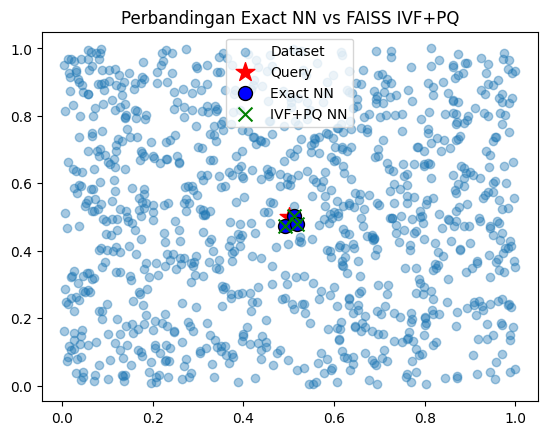

In [7]:
import numpy as np
import faiss
import matplotlib.pyplot as plt
import time

# 1. Buat dataset 2D sederhana
np.random.seed(42)
X = np.random.rand(1000, 2).astype('float32')  # 1000 titik 2D
query = np.array([[0.5, 0.5]], dtype='float32')  # query di tengah

# 2. Exact NN dengan IndexFlatL2 (brute force tapi cepat)
index_flat = faiss.IndexFlatL2(2)   # L2 = Euclidean distance
index_flat.add(X)

start = time.time()
D_flat, I_flat = index_flat.search(query, 3)  # cari 3 tetangga terdekat
end = time.time()
time_flat = end - start

# 3. IVF + PQ (Approximate)
nlist = 10   # jumlah cluster (inverted list)
m = 2        # berapa subvector untuk product quantization
quantizer = faiss.IndexFlatL2(2)   # dipakai IVF untuk cluster awal
index_ivfpq = faiss.IndexIVFPQ(quantizer, 2, nlist, m, 8)  # 8 bit per subvector

index_ivfpq.train(X)  # training centroid
index_ivfpq.add(X)

start = time.time()
D_ivfpq, I_ivfpq = index_ivfpq.search(query, 3)
end = time.time()
time_ivfpq = end - start

# 4. Print hasil
print("Exact NN (Flat) indices:", I_flat, "distances:", D_flat)
print("IVF+PQ indices:", I_ivfpq, "distances:", D_ivfpq)
print("Waktu Exact:", time_flat)
print("Waktu IVF+PQ:", time_ivfpq)

# 5. Visualisasi
plt.scatter(X[:,0], X[:,1], alpha=0.4, label="Dataset")
plt.scatter(query[:,0], query[:,1], c='red', marker='*', s=200, label="Query")

# Tetangga dari Flat
plt.scatter(X[I_flat[0],0], X[I_flat[0],1], c='blue', s=100, edgecolor='k', label="Exact NN")

# Tetangga dari IVF+PQ
plt.scatter(X[I_ivfpq[0],0], X[I_ivfpq[0],1], c='green', marker='x', s=100, label="IVF+PQ NN")

plt.legend()
plt.title("Perbandingan Exact NN vs FAISS IVF+PQ")
plt.show()

Lakukan percobaan pada metric distance yang berbeda, 1000 vs 1jt data, 2D vs 5D data. catat hasilnya pada tabel yang anda buat sendiri seperti pada praktikum 1.

# Task
Continue the code in the different metric distance for the FAISS section to include experiments with 1000 and 1,000,000 data points and 2D vs 5D data, using both Euclidean and Inner Product metrics. Present the results in a table.

## Define experiment parameters

### Subtask:
Define the list of data sizes (1000, 1,000,000), dimensions (2, 5), and metrics (Euclidean, Inner Product).


**Reasoning**:
Define the lists for the number of data points, dimensions, and metrics as specified in the subtask.



In [17]:
list_n_points = [1000, 1000000]
list_n_dims = [2, 5]
list_metrics_faiss = ['euclidean', 'inner_product']

In [18]:
results_list = []
for n_points in list_n_points:
    for n_dims in list_n_dims:
        for metric in list_metrics_faiss:
            print(f"Running experiment with N_Points: {n_points}, Dimensions: {n_dims}, Metric: {metric}")

            # Generate random dataset
            X = np.random.rand(n_points, n_dims).astype('float32') * 100

            # Generate random query vector
            query_vector = np.random.rand(1, n_dims).astype('float32') * 100

            # Create FAISS index based on metric
            if metric == 'euclidean':
                index = faiss.IndexFlatL2(n_dims)
            elif metric == 'inner_product':
                index = faiss.IndexFlatIP(n_dims)
            else:
                print(f"Unknown metric: {metric}")
                continue

            # Add data to the index
            index.add(X)

            # Perform the search
            start_search = time.time()
            D, I = index.search(query_vector, k_neighbors)
            end_search = time.time()

            # Calculate search time
            search_time_ms = (end_search - start_search) * 1000

            print(f"  Search Time: {search_time_ms:.4f} ms")
            print(f"  Indices Found: {I}")
            print(f"  Distances Found: {D}")

            results_list.append({
                'N_Points': n_points,
                'Dimensions': n_dims,
                'Metric': metric,
                'Search_Time_ms': search_time_ms,
                'Indices': I.tolist(),
                'Distances': D.tolist()
            })

Running experiment with N_Points: 1000, Dimensions: 2, Metric: euclidean
  Search Time: 0.0465 ms
  Indices Found: [[129  21 702]]
  Distances Found: [[3.8025727 7.540006  7.735361 ]]
Running experiment with N_Points: 1000, Dimensions: 2, Metric: inner_product
  Search Time: 0.0362 ms
  Indices Found: [[635 531 655]]
  Distances Found: [[13768.038 13720.729 13694.758]]
Running experiment with N_Points: 1000, Dimensions: 5, Metric: euclidean
  Search Time: 0.0286 ms
  Indices Found: [[375 298 702]]
  Distances Found: [[700.1543  717.1573  902.32245]]
Running experiment with N_Points: 1000, Dimensions: 5, Metric: inner_product
  Search Time: 0.0265 ms
  Indices Found: [[834 706 661]]
  Distances Found: [[29569.025 29485.37  28342.945]]
Running experiment with N_Points: 1000000, Dimensions: 2, Metric: euclidean
  Search Time: 5.5127 ms
  Indices Found: [[725594 252065 750513]]
  Distances Found: [[0.0061495  0.01498244 0.02525024]]
Running experiment with N_Points: 1000000, Dimensions: 2,

In [19]:
import pandas as pd

df_faiss_results = pd.DataFrame(results_list)
display(df_faiss_results)

,N_Points,Dimensions,Metric,Search_Time_ms,Indices,Distances
0,1000,2,euclidean,0.046492,"[[129, 21, 702]]","[[3.802572727203369, 7.540006160736084, 7.7353..."
1,1000,2,inner_product,0.036240,"[[635, 531, 655]]","[[13768.0380859375, 13720.728515625, 13694.757..."
2,1000,5,euclidean,0.028610,"[[375, 298, 702]]","[[700.154296875, 717.1572875976562, 902.322448..."
3,1000,5,inner_product,0.026464,"[[834, 706, 661]]","[[29569.025390625, 29485.369140625, 28342.9453..."
4,1000000,2,euclidean,5.512714,"[[725594, 252065, 750513]]","[[0.006149497348815203, 0.014982438646256924, ..."
5,1000000,2,inner_product,5.809546,"[[47248, 894373, 434608]]","[[10185.2412109375, 10181.98828125, 10178.0664..."
6,1000000,5,euclidean,6.954670,"[[929936, 80996, 700978]]","[[16.62423324584961, 32.51517868041992, 32.958..."
7,1000000,5,inner_product,6.941319,"[[433046, 124963, 826646]]","[[11505.8330078125, 11467.61328125, 11463.9492..."


# Praktikum 3 - HNSW

In [20]:
!pip install hnswlib

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for hnswlib: filename=hnswlib-0.8.0-cp312-cp312-linux_x86_64.whl size=2528149 sha256=7b65eeb2fcfc9ff4e3596ee9863706a0577445181f6fd3f61f4f0d68599ca6cc
  Stored in directory: /root/.cache/pip/wheels/ac/39/b3/cbd7f9cbb76501d2d5fbc84956e70d0b94e788aac87bda465e
Successfully built hnswlib


In [21]:
import hnswlib
import numpy as np
import time
from sklearn.neighbors import NearestNeighbors

# ===========================
# 1. Buat data 2D acak
# ===========================
num_elements = 1000
dim = 2
data = np.random.random((num_elements, dim)).astype(np.float32)

# Query point
query = np.array([[0.5, 0.5]], dtype=np.float32)
k = 5  # cari 5 tetangga terdekat

# ===========================
# 2. Exact NN (Brute Force)
# ===========================
nn = NearestNeighbors(n_neighbors=k, algorithm='brute', metric='euclidean')
nn.fit(data)

start = time.time()
distances, indices = nn.kneighbors(query)
end = time.time()

print("=== Exact NN ===")
print("Indices:", indices)
print("Distances:", distances)
print("Waktu:", end - start, "detik")

# ===========================
# 3. HNSW
# ===========================
# Inisialisasi index HNSW
p = hnswlib.Index(space='l2', dim=dim)

# Ukuran maksimum elemen yang bisa ditampung
p.init_index(max_elements=num_elements, ef_construction=100, M=16)

# Tambahkan data
p.add_items(data)

# Set parameter pencarian
p.set_ef(50)   # tradeoff speed vs accuracy

start = time.time()
labels, distances = p.knn_query(query, k=k)
end = time.time()

print("\n=== HNSW ===")
print("Indices:", labels)
print("Distances:", distances)
print("Waktu:", end - start, "detik")


=== Exact NN ===
Indices: [[317 448 892 843  38]]
Distances: [[0.01333264 0.01929028 0.0394427  0.03982243 0.04248696]]
Waktu: 0.04941248893737793 detik

=== HNSW ===
Indices: [[317 448 892 843  38]]
Distances: [[0.00017776 0.00037211 0.00155573 0.00158583 0.00180514]]
Waktu: 0.00018215179443359375 detik


Lakukan percobaan pada metric distance yang berbeda. catat hasilnya pada tabel yang anda buat sendiri seperti pada praktikum 1.

In [29]:
list_n_points = [1000, 1000000]
list_n_dims = [2, 5]
list_metrics_hnsw = ['l2', 'ip', 'cosine']

In [31]:
import hnswlib
import numpy as np
import time
import pandas as pd

hnsw_results_list = []

print(f"{'Metric':<10} | {'Dimensions':<10} | {'N Points':<10} | {'Build Time (ms)':<15} | {'Search Time (ms)':<15} | {'Indices Found':<30}")
print("-" * 110)


for n_points in list_n_points:
    for n_dims in list_n_dims:
        for metric in list_metrics_hnsw:
            data = np.random.random((n_points, n_dims)).astype(np.float32)
            query = np.random.random((1, n_dims)).astype(np.float32)
            k = 5 # Number of neighbors to search for
            p = hnswlib.Index(space=metric, dim=n_dims)

            ef_construction = 100
            M = 16
            p.init_index(max_elements=n_points, ef_construction=ef_construction, M=M)

            # Add data to the index and measure build time
            start_build = time.time()
            p.add_items(data)
            end_build = time.time()
            build_time_ms = (end_build - start_build) * 1000

            # Set search parameter (ef)
            # This parameter affects search time and accuracy
            ef_search = 50
            p.set_ef(ef_search)

            # Perform the search and measure search time
            start_search = time.time()
            labels, distances = p.knn_query(query, k=k)
            end_search = time.time()
            search_time_ms = (end_search - start_search) * 1000

            # Store the results
            hnsw_results_list.append({
                'N_Points': n_points,
                'Dimensions': n_dims,
                'Metric': metric,
                'Build_Time_ms': build_time_ms,
                'Search_Time_ms': search_time_ms,
                'Indices': labels.tolist(),
                'Distances': distances.tolist()
            })
            print(f"{metric:<10} | {n_dims:<10} | {n_points:<10} | {build_time_ms:<15.4f} | {search_time_ms:<15.4f} | {str(labels.tolist()):<30}")

    if n_points != list_n_points[-1]:
        print("-" * 110)

df_hnsw_results = pd.DataFrame(hnsw_results_list)
display(df_hnsw_results)

Metric     | Dimensions | N Points   | Build Time (ms) | Search Time (ms) | Indices Found                 
--------------------------------------------------------------------------------------------------------------
l2         | 2          | 1000       | 43.2966         | 0.0858          | [[647, 721, 307, 761, 96]]    
ip         | 2          | 1000       | 31.1575         | 0.0608          | [[329, 377, 839, 591, 743]]   
cosine     | 2          | 1000       | 20.7651         | 0.3076          | [[723, 169, 573, 290, 442]]   
l2         | 5          | 1000       | 31.9529         | 0.0677          | [[796, 819, 541, 846, 281]]   
ip         | 5          | 1000       | 44.4169         | 0.0727          | [[475, 384, 435, 781, 125]]   
cosine     | 5          | 1000       | 38.7208         | 0.0603          | [[37, 957, 603, 591, 953]]    
--------------------------------------------------------------------------------------------------------------
l2         | 2          | 1000000  

,N_Points,Dimensions,Metric,Build_Time_ms,Search_Time_ms,Indices,Distances
0,1000,2,l2,43.296576,0.085831,"[[647, 721, 307, 761, 96]]","[[1.4386238035513088e-05, 0.000310671894112601..."
1,1000,2,ip,31.157494,0.060797,"[[329, 377, 839, 591, 743]]","[[0.10732614994049072, 0.11472171545028687, 0...."
2,1000,2,cosine,20.765066,0.307560,"[[723, 169, 573, 290, 442]]","[[0.0, 1.1920928955078125e-07, 2.3841857910156..."
3,1000,5,l2,31.952858,0.067711,"[[796, 819, 541, 846, 281]]","[[0.050249047577381134, 0.05797947943210602, 0..."
4,1000,5,ip,44.416904,0.072718,"[[475, 384, 435, 781, 125]]","[[-0.7026689052581787, -0.6996986865997314, -0..."
5,1000,5,cosine,38.720846,0.060320,"[[37, 957, 603, 591, 953]]","[[0.005133450031280518, 0.006453514099121094, ..."
6,1000000,2,l2,59803.032875,0.118494,"[[877878, 232344, 904226, 946640, 494704]]","[[3.687381422423641e-08, 1.5928330299175286e-0..."
7,1000000,2,ip,42162.757874,0.086069,"[[992232, 913738, 851885, 21924, 234245]]","[[0.8870553970336914, 0.8870813846588135, 0.88..."
8,1000000,2,cosine,98193.661451,0.182867,"[[248693, 251430, 632709, 777337, 846857]]","[[-2.384185791015625e-07, -2.384185791015625e-..."
9,1000000,5,l2,97999.911785,0.138044,"[[46881, 787084, 870574, 926221, 728511]]","[[0.0008221324533224106, 0.0015844672452658415..."


# Praktikum 4 - Perbandingan

In [32]:
import numpy as np
import time
from annoy import AnnoyIndex
import faiss
import hnswlib

# ===============================
# 1. Buat dataset 1 juta data 5D
# ===============================
n_data = 1_000_000   # bisa coba 100_000 dulu jika RAM terbatas
dim = 5
X = np.random.random((n_data, dim)).astype(np.float32)

# Query point
query = np.random.random((1, dim)).astype(np.float32)
k = 10

# ===============================
# 2. Annoy
# ===============================
print("=== Annoy ===")
ann_index = AnnoyIndex(dim, 'euclidean')

start = time.time()
for i in range(n_data):
    ann_index.add_item(i, X[i])
ann_index.build(10)  # 10 trees
build_time = time.time() - start

start = time.time()
neighbors = ann_index.get_nns_by_vector(query[0], k, include_distances=True)
query_time = time.time() - start

print("Build time:", build_time, "detik")
print("Query time:", query_time, "detik")
print("Neighbors:", neighbors[0][:5], "...")

# ===============================
# 3. FAISS (Flat Index)
# ===============================
print("\n=== FAISS (IndexFlatL2) ===")
faiss_index = faiss.IndexFlatL2(dim)

start = time.time()
faiss_index.add(X)
build_time = time.time() - start

start = time.time()
distances, indices = faiss_index.search(query, k)
query_time = time.time() - start

print("Build time:", build_time, "detik")
print("Query time:", query_time, "detik")
print("Neighbors:", indices[0][:5], "...")

# ===============================
# 4. HNSW (hnswlib)
# ===============================
print("\n=== HNSW (hnswlib) ===")
hnsw_index = hnswlib.Index(space='l2', dim=dim)

start = time.time()
hnsw_index.init_index(max_elements=n_data, ef_construction=200, M=16)
hnsw_index.add_items(X)
build_time = time.time() - start

hnsw_index.set_ef(50)

start = time.time()
labels, distances = hnsw_index.knn_query(query, k=k)
query_time = time.time() - start

print("Build time:", build_time, "detik")
print("Query time:", query_time, "detik")
print("Neighbors:", labels[0][:5], "...")


=== Annoy ===
Build time: 22.626758098602295 detik
Query time: 0.00037932395935058594 detik
Neighbors: [905756, 154246, 715986, 3684, 512305] ...

=== FAISS (IndexFlatL2) ===
Build time: 0.009208440780639648 detik
Query time: 0.006433963775634766 detik
Neighbors: [905756 154246 715986   3684 512305] ...

=== HNSW (hnswlib) ===
Build time: 176.4186987876892 detik
Query time: 0.0002739429473876953 detik
Neighbors: [905756 154246 715986   3684 512305] ...


Lakukan percobaan pada metric distance yang berbeda. catat hasilnya pada tabel yang anda buat sendiri seperti pada praktikum 1.

# Percobaan 5

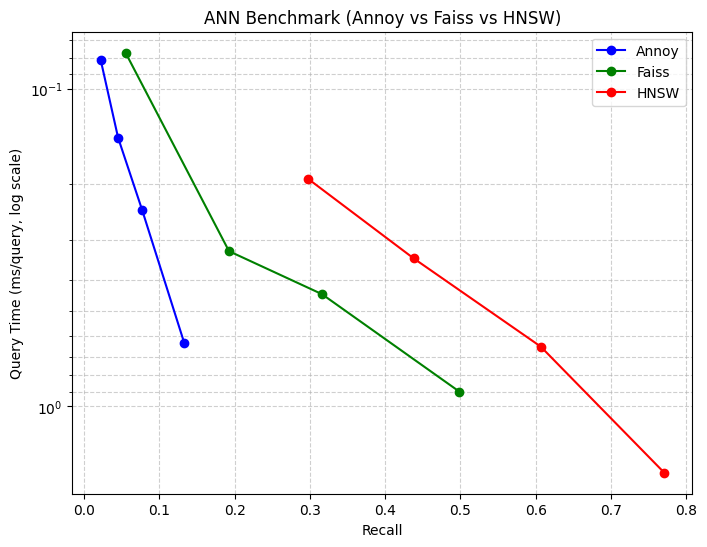

In [33]:
import numpy as np
import time
import faiss
from annoy import AnnoyIndex
import hnswlib
import matplotlib.pyplot as plt

# -------------------------------
# Dataset random
# -------------------------------
d = 128        # dimensi
nb = 100000    # jumlah database vector
nq = 1000      # jumlah query

np.random.seed(42)
xb = np.random.random((nb, d)).astype('float32')
xq = np.random.random((nq, d)).astype('float32')

# -------------------------------
# Ground truth dengan FAISS brute force
# -------------------------------
index_flat = faiss.IndexFlatL2(d)
index_flat.add(xb)
k = 10
_, gt_idx = index_flat.search(xq, k)

# -------------------------------
# Fungsi recall
# -------------------------------
def recall_at_k(I_pred, I_gt, k):
    correct = 0
    for i in range(len(I_pred)):
        correct += len(set(I_pred[i][:k]) & set(I_gt[i][:k]))
    return correct / (len(I_pred) * k)

# -------------------------------
# Benchmark Annoy
# -------------------------------
def run_annoy(xb, xq, n_trees=10, search_k=1000, k=10):
    f = xb.shape[1]
    index = AnnoyIndex(f, 'euclidean')
    for i, v in enumerate(xb):
        index.add_item(i, v)
    index.build(n_trees)

    start = time.time()
    I = [index.get_nns_by_vector(v, k, search_k=search_k) for v in xq]
    elapsed = (time.time() - start) * 1000 / len(xq)  # ms/query
    rec = recall_at_k(I, gt_idx, k)
    return rec, elapsed

# -------------------------------
# Benchmark FAISS IVF
# -------------------------------
def run_faiss(xb, xq, nlist=100, nprobe=10, k=10):
    quantizer = faiss.IndexFlatL2(d)
    index = faiss.IndexIVFFlat(quantizer, d, nlist, faiss.METRIC_L2)
    index.train(xb)
    index.add(xb)

    index.nprobe = nprobe
    start = time.time()
    _, I = index.search(xq, k)
    elapsed = (time.time() - start) * 1000 / len(xq)
    rec = recall_at_k(I, gt_idx, k)
    return rec, elapsed

# -------------------------------
# Benchmark HNSW
# -------------------------------
def run_hnsw(xb, xq, ef=100, M=16, k=10):
    num_elements = xb.shape[0]
    p = hnswlib.Index(space='l2', dim=d)
    p.init_index(max_elements=num_elements, ef_construction=200, M=M)
    p.add_items(xb)
    p.set_ef(ef)

    start = time.time()
    I, _ = p.knn_query(xq, k)
    elapsed = (time.time() - start) * 1000 / len(xq)
    rec = recall_at_k(I, gt_idx, k)
    return rec, elapsed

# -------------------------------
# Jalankan benchmark dengan beberapa parameter
# -------------------------------
results = {"Annoy": [], "Faiss": [], "HNSW": []}

# Annoy
for sk in [200, 500, 1000, 2000]:
    rec, t = run_annoy(xb, xq, n_trees=10, search_k=sk)
    results["Annoy"].append((rec, t))

# FAISS
for npb in [1, 5, 10, 20]:
    rec, t = run_faiss(xb, xq, nlist=100, nprobe=npb)
    results["Faiss"].append((rec, t))

# HNSW
for ef in [50, 100, 200, 400]:
    rec, t = run_hnsw(xb, xq, ef=ef)
    results["HNSW"].append((rec, t))

# -------------------------------
# Visualisasi trade-off
# -------------------------------
plt.figure(figsize=(8,6))
for label, color in zip(results.keys(), ["blue","green","red"]):
    recall, qtime = zip(*results[label])
    plt.plot(recall, qtime, marker="o", label=label, color=color)

plt.xlabel("Recall")
plt.ylabel("Query Time (ms/query, log scale)")
plt.yscale("log")
plt.gca().invert_yaxis()  # invert Y, makin kanan makin turun
plt.title("ANN Benchmark (Annoy vs Faiss vs HNSW)")
plt.legend()
plt.grid(True, which="both", ls="--", alpha=0.6)
plt.show()